In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startups-data/kaggle_startups_train_28062024.csv
/kaggle/input/startups-data/kaggle_startups_sample_submit_28062024.csv
/kaggle/input/startups-data/kaggle_startups_test_28062024.csv
/kaggle/input/googlenewsvectors/GoogleNews-vectors-negative300.bin
/kaggle/input/stp-loc/Location_Startups_Train.csv
/kaggle/input/stp-loc/Location_Startups_Test.csv


<div class="alert-info" style="padding: 20px; border-radius: 10px">  

# Проект: Предсказание успешности стартапов

## Цель проекта
Разработать модель машинного обучения для предсказания вероятности успешности стартапа (закрытие или продолжение работы) на основе предоставленных данных. На основе анализа данных выделить факторы, влияющие на успех стартапа, и сформулировать рекомендации для повышения шансов на успех.

**Основные критерии:**  
- Высокая точность предсказаний модели, измеряемая метрикой F1-Score.  
- Оценка значимости факторов, влияющих на успешность стартапов.  
- Формулировка рекомендаций на основе анализа данных.  

---

## План проведения работы

1. **Загрузка, изучение и предобработка данных**  
   - Импортировать необх, основные из ниходимые библиотеки: `pandas`, `matplotlib`, `seaborn`, `scikit-learn`, `CatBoost`, `shap`, `phik`.  
   - Загрузить данные из файлов: `kage_startups_train_01.csv`, `kae_startups_test_01.csv`, `kaggle_stars_sample_submit_01.csv`.  
   - Изучить данные: проверить размер, типы данных, наличие пропусков и временной период.  
   - Обработать пропуски и преобразовать данные (например, даты в формат `datetime`).  

2. **Исследовательский анализ данных (EDA)**  
   - Провести статистический анализ данных.  
   - Построить визуализации распределений признаков и их корреляций.  
   - Выявить признаки, связанные с успешностью стартапов.  

3. **Отбор признаков и проверка мультиколлинеарности**  
   - Построить корреляционную матрицу и визуализировать её.  
   - Исключить признаки с высокой мультиколлинеарностью.  

4. **Разработка пайплайна для предобработки данных и обучения моделей**  
   - Кодирование категориальных признаков (`OneHotEncoding`, `LabelEncoding`).  
   - Масштабирование числовых признаков и обработка дисбаланса классов с `SMOTE`.  
   - Разделение данных на обучающую и валидационную выборки для модели `CatBoost`.  

5. **Подбор гиперпараметров и выбор лучшей модели**  
   - Настройка гиперпараметров с `GridSearchCV` или `Optuna`.  
   - Оценка финальной модели на тестовой выборке.  

6. **Анализ важности признаков**  
   - Использовать `SHAP` для анализа значимости признаков.  
   - Построить графики важности признаков (`SHAP summary plots`).  

7. **Формулировка рекомендаций на основе анализа данных**  
   - Выделить ключевые факторы успеха стартапов.  
   - Построить графики и дать рекомендации для повышения шансов на успех.  

8. **Подготовка итогового отчета**  
   - Описать задачу, проведённый анализ данных и обучение моделей.  
   - Представить ключевые выводы, визуализации и рекомендации.  
   - Предоставить псказания в формате `kaggle_startups_sample_submit_01.csv`.  

---

## Дополнительное задание  
- Реализовать пайплайн для автоматизации процесса предобработки и обучения.  
- Провести углублённый анализ данных и разработать рекомендации для улучшения метрик стартапов.  

</div>

# **Загрузка данных и импортирование библиотек**

In [2]:
!pip install phik -q
!pip install shap -q
!pip install gensim -q
!pip install geopy -q
!pip install tqdm -q
!pip install pycountry -q
!pip install catboost -q
!pip install optuna -q
!pip install spacy -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tsfresh 0.20.3 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you hav

In [3]:
# Библиотеки для работы с данными
import pandas as pd  
import numpy as np  
import optuna
import spacy
from sklearn.cluster import KMeans
from collections import defaultdict

# Визуализация данных
import seaborn as sns  
import matplotlib.pyplot as plt  

# Анализ данных и предобработка
import re  
from pycountry import countries  

# Анализ мультиколлинеарности
from phik import phik_matrix  

# Работа с текстовыми данными
from gensim.models import Word2Vec  
from nltk.tokenize import word_tokenize  

# Метрики и анализ
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import (f1_score,  
                             classification_report,  
                             confusion_matrix,
                             precision_score)  

# Предобработка данных
from sklearn.impute import SimpleImputer  
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder,
                                   FunctionTransformer)  

# Машинное обучение
from sklearn.model_selection import (train_test_split,  
                                     GridSearchCV,
                                     cross_val_score, 
                                     StratifiedKFold) 

from sklearn.ensemble import RandomForestClassifier  
from imblearn.over_sampling import SMOTE  
from catboost import CatBoostClassifier, cv, Pool  

# Анализ важности признаков
import shap  

# Настройка Pandas для удобного отображения данных
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None) 

In [4]:
train_data = pd.read_csv('../input/startups-data/kaggle_startups_train_28062024.csv', sep=',')
test_data = pd.read_csv('../input/startups-data/kaggle_startups_test_28062024.csv', sep=',')

In [5]:
display(test_data.head(), test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


None

In [6]:
display(train_data.head(), train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


None

<div class="alert-info" style="padding: 20px; border-radius: 10px">  
Датасеты успешно загружены. Необходимые библиотеки загружены и импортированы. По первому взгляду видны пропуски во многих столбцах, а также проблемы со столбцом category_list, переходим к предобработке данных.
</div>

# **Предобработка данных**

In [7]:
# Проверка пропущенных значений
print(train_data.isna().sum())
print()
print(test_data.isna().sum())

name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5502
state_code            6763
region                6359
city                  6359
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64

name                    0
category_list         591
funding_total_usd    2578
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64


In [8]:
df_train = train_data.dropna(subset=['name']).reset_index(drop=True)
df_test = test_data.copy()

In [9]:
# Предобработка данных
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r"[^A-Za-z0-9\s]", "", text).lower()
    return text

df_train['name_processed'] = df_train['name'].apply(preprocess_text)
df_train['category_list_processed'] = df_train['category_list'].fillna("").apply(lambda x: [cat.strip() for cat in x.split("|")])

# Подготовка текста для Word2Vec
corpus = df_train['name_processed'].tolist() + [" ".join(cats) for cats in df_train['category_list_processed']]
tokenized_corpus = [word_tokenize(doc) for doc in corpus]

# Обучение Word2Vec
w2v_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Функция для получения среднего вектора для текста
def get_mean_vector(model, text):
    tokens = word_tokenize(text)
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Выбор наиболее подходящей категории
def get_best_category(row):
    name_vec = get_mean_vector(w2v_model, row['name_processed'])
    best_category = None
    max_similarity = -1
    for category in row['category_list_processed']:
        category_vec = get_mean_vector(w2v_model, category)
        similarity = cosine_similarity([name_vec], [category_vec])[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            best_category = category
    return best_category

# Применение функции
df_train['best_category'] = df_train.apply(get_best_category, axis=1)


display(df_train['best_category'].value_counts().head(25))

best_category
Software               4107
Biotechnology          3457
                       2465
E-Commerce             1608
Mobile                 1582
Curated Web            1335
Games                  1099
Health Care            1036
Enterprise Software    1008
Clean Technology        978
Advertising             870
Hardware + Software     860
Health and Wellness     817
Manufacturing           805
Social Media            740
Education               678
Finance                 658
Analytics               559
Medical                 553
Semiconductors          502
Consulting              489
Internet                480
Security                465
Technology              458
Real Estate             444
Name: count, dtype: int64

In [10]:
# Предобработка данных
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r"[^A-Za-z0-9\s]", "", text).lower()
    return text

df_test['name_processed'] = df_test['name'].apply(preprocess_text)
df_test['category_list_processed'] = df_test['category_list'].fillna("").apply(lambda x: [cat.strip() for cat in x.split("|")])

# Подготовка текста для Word2Vec
corpus = df_test['name_processed'].tolist() + [" ".join(cats) for cats in df_test['category_list_processed']]
tokenized_corpus = [word_tokenize(doc) for doc in corpus]

# Обучение Word2Vec
w2v_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Функция для получения среднего вектора для текста
def get_mean_vector(model, text):
    tokens = word_tokenize(text)
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Выбор наиболее подходящей категории
def get_best_category(row):
    name_vec = get_mean_vector(w2v_model, row['name_processed'])
    best_category = None
    max_similarity = -1
    for category in row['category_list_processed']:
        category_vec = get_mean_vector(w2v_model, category)
        similarity = cosine_similarity([name_vec], [category_vec])[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            best_category = category
    return best_category

# Применение функции
df_test['best_category'] = df_test.apply(get_best_category, axis=1)


display(df_test['best_category'].value_counts().head(25))

best_category
Software               1032
Biotechnology           799
                        591
Mobile                  493
E-Commerce              425
Curated Web             302
Clean Technology        249
Health Care             243
Enterprise Software     238
Games                   231
Education               222
Social Media            221
Manufacturing           213
Hardware + Software     208
Advertising             206
Finance                 203
Health and Wellness     201
Internet                158
Services                153
Technology              139
Analytics               130
Consulting              124
Apps                    124
Security                122
Hospitality             115
Name: count, dtype: int64

In [11]:
df_train.isna().sum()

name                           0
category_list               2465
funding_total_usd          10069
status                         0
country_code                5502
state_code                  6763
region                      6359
city                        6359
funding_rounds                 0
founded_at                     0
first_funding_at               0
last_funding_at                0
closed_at                  47599
name_processed                 0
category_list_processed        0
best_category                  0
dtype: int64

In [12]:
# Меняем местами столбцы 'category_list' и 'best_category'
columns = list(df_train.columns)
category_index = columns.index('category_list')
best_category_index = columns.index('best_category')

# Перестановка столбцов
columns[category_index], columns[best_category_index] = columns[best_category_index], columns[category_index]
df_train = df_train[columns]

# Проверка результата
df_train.head()

,name,best_category,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,name_processed,category_list_processed,category_list
0,Lunchgate,Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN,lunchgate,"[Online Reservations, Restaurants]",Online Reservations|Restaurants
1,EarLens,Medical,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN,earlens,"[Manufacturing, Medical, Medical Devices]",Manufacturing|Medical|Medical Devices
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN,reviva pharmaceuticals,[Biotechnology],Biotechnology
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN,sancilio and company,[Health Care],Health Care
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN,wiretough cylinders,[Manufacturing],Manufacturing


In [13]:
df_train = df_train.drop(columns=['name_processed', 'category_list_processed', 'category_list'])

In [14]:
# Переименование столбца 'best_category' в 'category_list'
df_train = df_train.rename(columns={'best_category': 'category_list'})

# Проверка результата
df_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Medical,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


In [15]:
# Меняем местами столбцы 'category_list' и 'best_category'
columns = list(df_test.columns)
category_index = columns.index('category_list')
best_category_index = columns.index('best_category')

# Перестановка столбцов
columns[category_index], columns[best_category_index] = columns[best_category_index], columns[category_index]
df_test = df_test[columns]

# Проверка результата
df_test.head()

,name,best_category,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,name_processed,category_list_processed,category_list
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501,crystalsol,[Clean Technology],Clean Technology
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717,jbi fish wings,[Hospitality],Hospitality
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295,coinplus,[Finance],Finance
3,Imagine Communications,Software,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748,imagine communications,"[Software, Video, Video Streaming]",Software|Video|Video Streaming
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209,dna13,[Software],Software


In [16]:
df_test = df_test.drop(columns=['name_processed', 'category_list_processed', 'category_list'])

In [17]:
# Переименование столбца 'best_category' в 'category_list'
df_test = df_test.rename(columns={'best_category': 'category_list'})

# Проверка результата
df_test.head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


In [18]:
# # Инициализация spaCy для лемматизации
# nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# # Функция очистки текста
# def preprocess_text(text):
#     if pd.isnull(text):
#         return None
#     text = re.sub("[^a-zA-Z]", " ", text)  # Удаление ненужных символов
#     text = text.lower().strip()  # Приведение к нижнему регистру
#     doc = nlp(text)
#     return " ".join([token.lemma_ for token in doc if not token.is_stop])

# # Очистка категорий
# df_train['clean_category_list'] = df_train['category_list'].apply(preprocess_text)

# # Преобразование данных в список предложений для Word2Vec
# sentences = [row.split() for row in df_train['clean_category_list'].dropna()]

# # Создание и обучение модели Word2Vec
# w2v_model = Word2Vec(
#     sentences,
#     vector_size=100,  # Размерность векторов
#     window=5,  # Контекстное окно
#     min_count=1,  # Минимальная частота слова
#     workers=4,  # Количество потоков
#     sg=0  # CBOW (0) или Skip-Gram (1)
# )

# # Получение векторов категорий
# category_vectors = []
# category_names = []

# for category in df_train['clean_category_list'].dropna().unique():
#     words = category.split()
#     vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
#     if vectors:
#         category_vectors.append(np.mean(vectors, axis=0))  # Средний вектор
#         category_names.append(category)

# # Кластеризация категорий с использованием KMeans 
# num_clusters = 500  # Количество кластеров
# kmeans = KMeans(
#     n_clusters=num_clusters,
#     init='k-means++',
#     max_iter=300,
#     tol=1e-4,
#     n_init=10,
#     random_state=42
# )
# kmeans.fit(category_vectors)

# # Присвоение новых кластеров
# cluster_labels = kmeans.labels_

# # Создание словаря с новыми категориями
# category_to_cluster = dict(zip(category_names, cluster_labels))

# # Присвоение новых категорий в датасете
# df_train['new_category'] = df_train['clean_category_list'].apply(
#     lambda x: f"Cluster_{category_to_cluster.get(x, 'Unknown')}" if x in category_to_cluster else "Unknown"
# )


# from IPython.display import display

# # Группировка данных по столбцу 'name' и подсчет значений 'category_list' и 'new_category'
# grouped_data = df_train.groupby('name').agg({
#     'category_list': lambda x: x.value_counts().to_dict(),
#     'new_category': lambda x: x.value_counts().to_dict()
# }).reset_index()



# # Вывод результата
# display(grouped_data)

In [19]:
# # Инициализация spaCy для лемматизации
# nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# # Функция очистки текста
# def preprocess_text(text):
#     if pd.isnull(text):
#         return None
#     text = re.sub("[^a-zA-Z]", " ", text)  # Удаление ненужных символов
#     text = text.lower().strip()  # Приведение к нижнему регистру
#     doc = nlp(text)
#     return " ".join([token.lemma_ for token in doc if not token.is_stop])

# # Очистка категорий
# df_test['clean_category_list'] = df_test['category_list'].apply(preprocess_text)

# # Преобразование данных в список предложений для Word2Vec
# sentences = [row.split() for row in df_test['clean_category_list'].dropna()]

# # Создание и обучение модели Word2Vec
# w2v_model = Word2Vec(
#     sentences,
#     vector_size=100,  # Размерность векторов
#     window=5,  # Контекстное окно
#     min_count=1,  # Минимальная частота слова
#     workers=4,  # Количество потоков
#     sg=0  # CBOW (0) или Skip-Gram (1)
# )

# # Получение векторов категорий
# category_vectors = []
# category_names = []

# for category in df_test['clean_category_list'].dropna().unique():
#     words = category.split()
#     vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
#     if vectors:
#         category_vectors.append(np.mean(vectors, axis=0))  # Средний вектор
#         category_names.append(category)

# # Кластеризация категорий с использованием KMeans 
# num_clusters = 500  # Количество кластеров
# kmeans = KMeans(
#     n_clusters=num_clusters,
#     init='k-means++',
#     max_iter=300,
#     tol=1e-4,
#     n_init=10,
#     random_state=42
# )
# kmeans.fit(category_vectors)

# # Присвоение новых кластеров
# cluster_labels = kmeans.labels_

# # Создание словаря с новыми категориями
# category_to_cluster = dict(zip(category_names, cluster_labels))

# # Присвоение новых категорий в датасете
# df_test['new_category'] = df_test['clean_category_list'].apply(
#     lambda x: f"Cluster_{category_to_cluster.get(x, 'Unknown')}" if x in category_to_cluster else "Unknown"
# )


# from IPython.display import display

# # Группировка данных по столбцу 'name' и подсчет значений 'category_list' и 'new_category'
# grouped_data_test = df_test.groupby('name').agg({
#     'category_list': lambda x: x.value_counts().to_dict(),
#     'new_category': lambda x: x.value_counts().to_dict()
# }).reset_index()



# # Вывод результата
# display(grouped_data_test)

In [20]:
# Загружаем данные
loc_test = pd.read_csv('../input/stp-loc/Location_Startups_Test.csv')
loc_train = pd.read_csv('../input/stp-loc/Location_Startups_Train.csv')

# Функция для разделения данных в столбце "location"
def split_location(data):
    location_split = data['location'].str.split('|', expand=True)
    data['country_code'] = location_split[0]
    data['region'] = location_split[1]
    data['city'] = location_split[2]
    return data

# Разделяем столбец 'location' на отдельные столбцы
loc_test = split_location(loc_test)
loc_train = split_location(loc_train)

# Функция для сопоставления названий стран с кодами IATA с использованием pycountry
def get_country_code(name):
    try:
        country = countries.lookup(name)
        return country.alpha_3
    except (LookupError, KeyError):
        return None  

# Автоматическое создание сопоставления для стран
def create_automated_mapping(data):
    unique_countries = data['country_code'].dropna().unique()
    mapping = {}
    for country_name in unique_countries:
        variants = [name.strip() for name in re.split(r'/|-|,', country_name)]
        code = None
        for variant in variants:
            code = get_country_code(variant)
            if code:
                break
        mapping[country_name] = code if code else country_name
    return mapping


automated_test_mapping = create_automated_mapping(loc_test)
automated_train_mapping = create_automated_mapping(loc_train)


# Ручное сопоставление для сложных случаев
manual_country_code_map = {
    "Algérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر": "DZA",  # Algeria
    "Ayiti": "HTI",  # Haiti
    "Azərbaycan": "AZE",  # Azerbaijan
    "België / Belgique / Belgien": "BEL",  # Belgium
    "Bosna i Hercegovina / Босна и Херцеговина": "BIH",  # Bosnia and Herzegovina
    "Brasil": "BRA",  # Brazil
    "Bénin": "BEN",  # Benin
    "Cameroun": "CMR",  # Cameroon
    "Crna Gora / Црна Гора": "MNE",  # Montenegro
    "Côte d’Ivoire": "CIV",  # Ivory Coast
    "Danmark": "DNK",  # Denmark
    "Deutschland": "DEU",  # Germany
    "Eesti": "EST",  # Estonia
    "Føroyar": "FRO",  # Faroe Islands
    "Hrvatska": "HRV",  # Croatia
    "Italia": "ITA",  # Italy
    "Kosova / Kosovo": "XKX",  # Kosovo
    "Ködörösêse tî Bêafrîka / République centrafricaine": "CAF",  # Central African Republic
    "Latvija": "LVA",  # Latvia
    "Lietuva": "LTU",  # Lithuania
    "Lëtzebuerg": "LUX",  # Luxembourg
    "Magyarország": "HUN",  # Hungary
    "Maroc ⵍⵎⵖⵔⵉⴱ المغرب": "MAR",  # Morocco
    "México": "MEX",  # Mexico
    "Nederland": "NLD",  # Netherlands
    "Norge": "NOR",  # Norway
    "Oʻzbekiston": "UZB",  # Uzbekistan
    "Palestinian Territory": "PSE",  # Palestine
    "Panamá": "PAN",  # Panama
    "Papua Niugini": "PNG",  # Papua New Guinea
    "Perú": "PER",  # Peru
    "Pilipinas": "PHL",  # Philippines
    "Polska": "POL",  # Poland
    "Portugal": "PRT",  # Portugal
    "România": "ROU",  # Romania
    "République démocratique du Congo": "COD",  # DR Congo
    "Schweiz/Suisse/Svizzera/Svizra": "CHE",  # Switzerland
    "Shqipëria": "ALB",  # Albania
    "Suomi / Finland": "FIN",  # Finland
    "Sverige": "SWE",  # Sweden
    "Sénégal": "SEN",  # Senegal
    "Tchad تشاد": "TCD",  # Chad
    "The Bahamas": "BHS",  # Bahamas
    "Türkiye": "TUR",  # Turkey
    "Việt Nam": "VNM",  # Vietnam
    "Éire / Ireland": "IRL",  # Ireland
    "Ísland": "ISL",  # Iceland
    "Österreich": "AUT",  # Austria
    "Česko": "CZE",  # Czechia
    "Ελλάς": "GRC",  # Greece
    "Россия": "RUS",  # Russia
    "Україна": "UKR",  # Ukraine
    "Беларусь": "BLR",  # Belarus
    "България": "BGR",  # Bulgaria
    "Кыргызстан": "KGZ",  # Kyrgyzstan
    "Қазақстан": "KAZ",  # Kazakhstan
    "Հայաստան": "ARM",  # Armenia
    "ישראל": "ISR",  # Israel
    "中国": "CHN",  # China
    "日本": "JPN",  # Japan
    "臺灣": "TWN",  # Taiwan
    "대한민국": "KOR",  # South Korea
    "España": "ESP",  # Spain
    "Slovensko": "SVK",  # Slovakia
    "বাংলাদেশ": "BGD",  # Bangladesh
    "السعودية": "SAU",  # Saudi Arabia
    "ไทย": "THA",  # Thailand
    "ປະເທດລາວ": "LAO",  # Laos
    "საქართველო": "GEO",  # Georgia
    "اليمن": "YEM",  # Yemen
    "Soomaaliya": "SOM",  # Somalia
    "نيجيريا": "NGA",  # Nigeria
    "مصر": "EGY",  # Egypt
    "ایران": "IRN",  # Iran
    "ประเทศไทย": "THA",  # Thailand
    "الكويت": "KWT",  # Kuwait
    "پاکستان": "PAK",  # Pakistan
    "नेपाल": "NPL",  # Nepal
    "မြန်မာ": "MMR",  # Myanmar
    "ኢትዮጵያ": "ETH",  # Ethiopia
    "Guinée": "GIN",  # Guinea
    "موريتانيا": "MRT",  # Mauritania
    "Ṃajeḷ": "MHL",  # Marshall Islands
    "Slovenija": "SVN",  # Slovenia
    "Soomaaliya الصومال": "SOM",  # Somalia
    "ليبيا": "LBY",  # Libya
    "Micronesia": "FSM",  # Micronesia
    "Србија": "SRB",  # Serbia
    "South Sudan جنوب السودان": "SSD",  # South Sudan
    "Κύπρος - Kıbrıs": "CYP",  # Cyprus
    "عمان": "OMN",  # Oman
    "الأردن": "JOR",  # Jordan
    "الإمارات العربية المتحدة": "ARE",  # United Arab Emirates
    "འབྲུགཡུལ་": "BTN",  # Bhutan
    "Timor-Leste": "TLS",  # Timor-Leste
    "لبنان": "LBN",  # Lebanon
    "سوريا": "SYR",  # Syria
    "العراق": "IRQ",  # Iraq
    "قطر": "QAT",  # Qatar
    "ព្រះរាជាណាចក្រ\u200bកម្ពុជា": "KHM",  # Cambodia
    "Moçambique": "MOZ",  # Mozambique
    "ދިވެހިރާއްޖެ": "MDV",  # Maldives
    "Viti": "FJI",  # Fiji
    "República Dominicana": "DOM",  # Dominican Republic
    "Brunei": "BRN",  # Brunei
    "Türkmenistan": "TKM"  # Turkmenistan
}

# Объединяем автоматическое и ручное сопоставления
final_country_code_map = {**automated_test_mapping, **automated_train_mapping, **manual_country_code_map}

# Применяем финальное сопоставление к данным
def apply_final_mapping(data):
    data['country_code'] = data['country_code'].map(final_country_code_map).fillna(data['country_code'])
    return data

loc_test = apply_final_mapping(loc_test)
loc_train = apply_final_mapping(loc_train)

# Функция для удаления столбца из DataFrame
def drop_column(data, column_name):
    if column_name in data.columns:
        data = data.drop(columns=[column_name])
    return data

# Удаляем столбец 'location' из тестовых и тренировочных данных
loc_test = drop_column(loc_test, 'location')
loc_train = drop_column(loc_train, 'location')


display(loc_test['country_code'].unique())
display(loc_train['country_code'].unique())

array([nan, 'NPL', 'FRA', 'PRT', 'NLD', 'ITA', 'KOR', 'USA', 'NOR', 'POL',
       'BEL', 'LUX', 'RUS', 'KEN', 'ZAF', 'CAN', 'YEM', 'JPN', 'GBR',
       'DEU', 'EST', 'BRA', 'AUS', 'COD', 'IND', 'CHE', 'TUR', 'BGD',
       'ARG', 'ROU', 'ETH', 'IRL', 'CUB', 'FIN', 'ESP', 'IDN', 'NGA',
       'MEX', 'TWN', 'PHL', 'GUY', 'URY', 'DNK', 'AUT', 'EGY', 'SGP',
       'MHL', 'CHN', 'GMB', 'THA', 'MAR', 'LKA', 'LVA', 'HUN', 'SWE',
       'BIH', 'LTU', 'UKR', 'IRN', 'IMN', 'NZL', 'GEO', 'VNM', 'BDI',
       'SAU', 'CZE', 'HRV', 'SEN', 'GRC', 'GIN', 'ISR', 'TZA', 'BGR',
       'GAB', 'ARM', 'FRO', 'BOL', 'MWI', 'SLE', 'HND', 'SVK', 'MMR',
       'ECU', 'BFA', 'COL', 'KGZ', 'DZA', 'BLR', 'ZMB', 'MYS', 'KWT',
       'MRT'], dtype=object)

array([nan, 'ESP', 'GBR', 'NOR', 'DEU', 'BEL', 'USA', 'CHN', 'VNM', 'FRA',
       'CAN', 'ITA', 'THA', 'UGA', 'SWE', 'SVN', 'IND', 'MMR', 'VEN',
       'CAF', 'TZA', 'NLD', 'RUS', 'SGP', 'CRI', 'CUB', 'MEX', 'ZAF',
       'CHE', 'DNK', 'PRT', 'ALB', 'AUT', 'PHL', 'CZE', 'BEN', 'ECU',
       'BFA', 'POL', 'AUS', 'IDN', 'ROU', 'LVA', 'HUN', 'IRL', 'PAK',
       'TUR', 'SOM', 'AIA', 'LBR', 'NIC', 'NPL', 'BRA', 'LBY', 'SVK',
       'BIH', 'COL', 'ARG', 'BGR', 'ETH', 'NAM', 'FIN', 'ZMB', 'CHL',
       'UKR', 'NGA', 'PER', 'JPN', 'MAR', 'TWN', 'MDG', 'GEO', 'FSM',
       'ISL', 'IRN', 'BLR', 'LKA', 'SLV', 'LAO', 'KOR', 'DZA', 'SRB',
       'CMR', 'NZL', 'ISR', 'MLT', 'URY', 'TCD', 'SEN', 'AGO', 'XKX',
       'SSD', 'CIV', 'CYP', 'OMN', 'BOL', 'BHS', 'SAU', 'PRY', 'JOR',
       'HRV', 'ARE', 'MYS', 'PNG', 'BTN', 'MLI', 'GTM', 'KEN', 'TON',
       'MNE', 'TLS', 'MWI', 'KWT', 'BWA', 'GRC', 'BGD', 'MDA', 'GHA',
       'LBN', 'COD', 'YEM', 'SYR', 'IRQ', 'KAZ', 'EST', 'HTI', 'UZB',
       'BLZ', '

In [21]:
#df_train.isna().sum()

In [22]:
# Объединение датасетов для обновления df_train данными из loc_train на основе столбца 'name'
df_train = df_train.merge(
    loc_train[['name', 'country_code', 'region', 'city']], 
    on='name', 
    how='left', 
    suffixes=('', '_loc')
)

# Замена значений в df_train на данные из loc_train, если они доступны
columns_to_update = ['country_code', 'region', 'city']
for column in columns_to_update:
    df_train[column] = df_train[f'{column}_loc'].combine_first(df_train[column])
    df_train.drop(columns=[f'{column}_loc'], inplace=True)

In [23]:
#df_train.isna().sum()

In [24]:
#df_test.isna().sum()

In [25]:
# Объединение датасетов для обновления df_train данными из loc_train на основе столбца 'name'
df_test = df_test.merge(
    loc_test[['name', 'country_code', 'region', 'city']], 
    on='name', 
    how='left', 
    suffixes=('', '_loc')
)

# Замена значений в df_train на данные из loc_train, если они доступны
columns_to_update = ['country_code', 'region', 'city']
for column in columns_to_update:
    df_test[column] = df_test[f'{column}_loc'].combine_first(df_test[column])
    df_test.drop(columns=[f'{column}_loc'], inplace=True)

In [26]:
#df_test.isna().sum()

In [27]:
# Устанавливаем конечную дату
end_date = pd.to_datetime('2018-01-01')

# Обновление lifetime в df_train
df_train['lifetime'] = (end_date - pd.to_datetime(df_train['founded_at'])).dt.days
df_train['closed_at'] = pd.to_datetime(df_train['closed_at'], errors='coerce')
df_test['founded_at'] = (end_date - pd.to_timedelta(df_test['lifetime'], unit='D'))

# Если стартап закрыт, пересчитываем lifetime
closed_mask = df_train['status'] == 'closed'
df_train.loc[closed_mask, 'lifetime'] = (
    pd.to_datetime(df_train.loc[closed_mask, 'closed_at']) -
    pd.to_datetime(df_train.loc[closed_mask, 'founded_at'])
).dt.days

In [28]:
# Переводим столбцы в формат datetime с нужным форматом
df_train['founded_at'] = pd.to_datetime(df_train['founded_at'])
df_train['first_funding_at'] = pd.to_datetime(df_train['first_funding_at'])
df_train['last_funding_at'] = pd.to_datetime(df_train['last_funding_at'])

df_test['first_funding_at'] = pd.to_datetime(df_test['first_funding_at'])
df_test['last_funding_at'] = pd.to_datetime(df_test['last_funding_at'])

test_data.info(), df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52515 entries, 0 to 52514
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -

(None, None)

In [29]:
# Логарифмирование, заполнение пропусков и обратное преобразование
log_funding = np.log1p(df_train['funding_total_usd'])
log_funding_median = log_funding.median()
log_funding_imputed = log_funding.fillna(log_funding_median)

# Прямое присвоение через .loc
df_train.loc[:, 'funding_total_usd'] = np.expm1(log_funding_imputed)

# Проверка результата
display(df_train['funding_total_usd'].describe())

count    5.251500e+04
mean     1.513261e+07
std      1.683482e+08
min      1.000000e+00
25%      5.300000e+05
50%      2.000000e+06
75%      6.789286e+06
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [30]:
# Логарифмирование, заполнение пропусков и обратное преобразование
log_funding = np.log1p(df_test['funding_total_usd'])
log_funding_median = log_funding.median()
log_funding_imputed = log_funding.fillna(log_funding_median)

# Прямое присвоение через .loc
df_test.loc[:, 'funding_total_usd'] = np.expm1(log_funding_imputed)

# Проверка результата
display(df_test['funding_total_usd'].describe())

count    1.312500e+04
mean     1.369138e+07
std      8.282737e+07
min      1.000000e+00
25%      5.010000e+05
50%      2.000000e+06
75%      6.513865e+06
max      4.715000e+09
Name: funding_total_usd, dtype: float64

### Попытки в парсинг

In [31]:
# import pandas as pd
# from geopy.geocoders import Nominatim
# from tqdm import tqdm
# import time

# # Загрузка датасета с пропущенными местоположениями
# file_path = '/kaggle/input/location/Missing_Location_Startups_Dataset.csv'
# missing_location_startups = pd.read_csv(file_path)

# # Инициализация геокодера
# geolocator = Nominatim(user_agent="startup_locator")

# # Функция для получения строки местоположения
# def get_location_string(name):
#     try:
#         location = geolocator.geocode(name, timeout=10)
#         if location:
#             # Разделяем адрес для формирования строки страна|регион|город
#             address_parts = location.address.split(', ')
#             country = address_parts[-1] if len(address_parts) > 0 else None
#             region = address_parts[-3] if len(address_parts) > 2 else None
#             city = address_parts[-4] if len(address_parts) > 3 else None
#             return f"{country}|{region}|{city}"
#         else:
#             return None
#     except Exception as e:
#         print(f"Error fetching location for {name}: {e}")
#         return None

# # Обработка каждого стартапа с индикатором прогресса
# location_data = []
# for index, row in tqdm(missing_location_startups.iterrows(), total=len(missing_location_startups), desc="Processing startups"):
#     location_str = get_location_string(row['name'])
#     location_data.append({'name': row['name'], 'location': location_str})
#     time.sleep(1)  # Задержка, чтобы избежать блокировки API

# # Создание нового датафрейма с результатами
# location_df = pd.DataFrame(location_data)

# # Сохранение обновленного файла
# output_path = '/kaggle/working/Updated_Location_Startups.csv'
# location_df.to_csv(output_path, index=False)
# print(f"Данные сохранены в файл: {output_path}")

In [32]:
# geo_data = pd.read_csv('/kaggle/working/Updated_Location_Startups.csv')
# print(geo_data.isna().sum())

<div class="alert-info" style="padding: 20px; border-radius: 10px">  
Значения в столбце с категориями были обработаны с помощью Word2Vec и преобразованы из списков в понятные и читаемые категории (первый раз работаю с этим инструментом). Далее был произведен парсинг по геоданным для заполнения столбцов страна, регион и город, это заняло много времени поэтому данные сохранил в отдельные файлы и следом обработал названия стран по стандартам ISO. Следующим шагом были заполнены пропуски и изменены типы данных, некоторыезначения были не тронуты, так как модель CatBoost умеет с ними работать. Код с помощью которого проводился парсинг был дополнительно закреплен.
Также, решил поэксперементировать с категориями и Word2Vec, код оставил и закомментировал, чтобы в будущем вернуться поэксперементировать над решением задачи с новыми знаниями. (Если есть полезные материалы и источники для изучения, буду рад если вы поделитесь)
</div>

## **Создание синтетических признаков**

In [33]:
def add_synthetic_features(df):
    # Заполняем пропущенные значения
    df['funding_total_usd'] = df['funding_total_usd'].fillna(0)
    df['funding_rounds'] = df['funding_rounds'].replace(0, 1).fillna(1)
    df['lifetime'] = df['lifetime'].replace(0, 1).fillna(1)

    # Преобразование дат
    if 'last_funding_at' in df and 'first_funding_at' in df:
        df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')
        df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')

    # Среднее финансирование на раунд
    df['avg_funding_per_round'] = df['funding_total_usd'] / df['funding_rounds']

    # Логарифм финансирования
    df['log_funding'] = np.log1p(df['funding_total_usd'])

    # Длительность между раундами
    df['avg_round_gap'] = df['lifetime'] / df['funding_rounds']

    # Дополнительные признаки
    if 'last_funding_at' in df and 'first_funding_at' in df:
        df['funding_span'] = (df['last_funding_at'] - df['first_funding_at']).dt.days.fillna(0)
    df['funding_speed'] = df['funding_total_usd'] / df['lifetime']

# Добавление признаков
for dataset in [df_train, df_test]:
    add_synthetic_features(dataset)

# Проверка
print("Train dataset:")
display(df_train.head())
print("\nTest dataset:")
display(df_test.head())

Train dataset:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime,avg_funding_per_round,log_funding,avg_round_gap,funding_span,funding_speed
0,Lunchgate,Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT,2998,4.143130e+05,13.627525,1499.000000,1310,276.392929
1,EarLens,Medical,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT,4748,1.073375e+07,17.575198,1187.000000,1393,9042.758846
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT,4383,1.181879e+07,17.383814,1461.000000,681,8089.523386
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaT,5114,7.416667e+06,16.917853,1704.666667,1051,4350.801721
4,WireTough Cylinders,Manufacturing,2000000.0,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT,2791,2.000000e+06,14.508658,2791.000000,0,716.589036



Test dataset:


,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime,founded_at,avg_funding_per_round,log_funding,avg_round_gap,funding_span,funding_speed
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501,2008-06-01,2819200.0,14.851964,3501.0,0,805.255641
1,JBI Fish & Wings,Hospitality,2000000.0,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717,2010-07-25,2000000.0,14.508658,2717.0,0,736.105999
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295,2014-06-16,214128.5,12.967481,647.5,126,330.700386
3,Imagine Communications,Software,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748,2005-01-01,8675000.0,17.362250,1187.0,1935,7308.340354
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209,2001-01-01,4530000.0,15.326233,6209.0,0,729.586085


<div class="alert-info" style="padding: 20px; border-radius: 10px">  
    
**Обработка пропусков**: Заполнены пропуски в funding_total_usd, funding_rounds и lifetime, исключены деления на ноль.

**Новые признаки**:
* avg_funding_per_round: среднее финансирование за раунд.
* log_funding: логарифм финансирования для сглаживания выбросов.
* avg_round_gap: средний временной интервал между раундами.
* funding_span: продолжительность финансирования.
* funding_speed: скорость привлечения средств.

**Корректность признаков**: Значения адекватны и готовы к анализу
</div>

# **Исследовательский анализ данных**

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

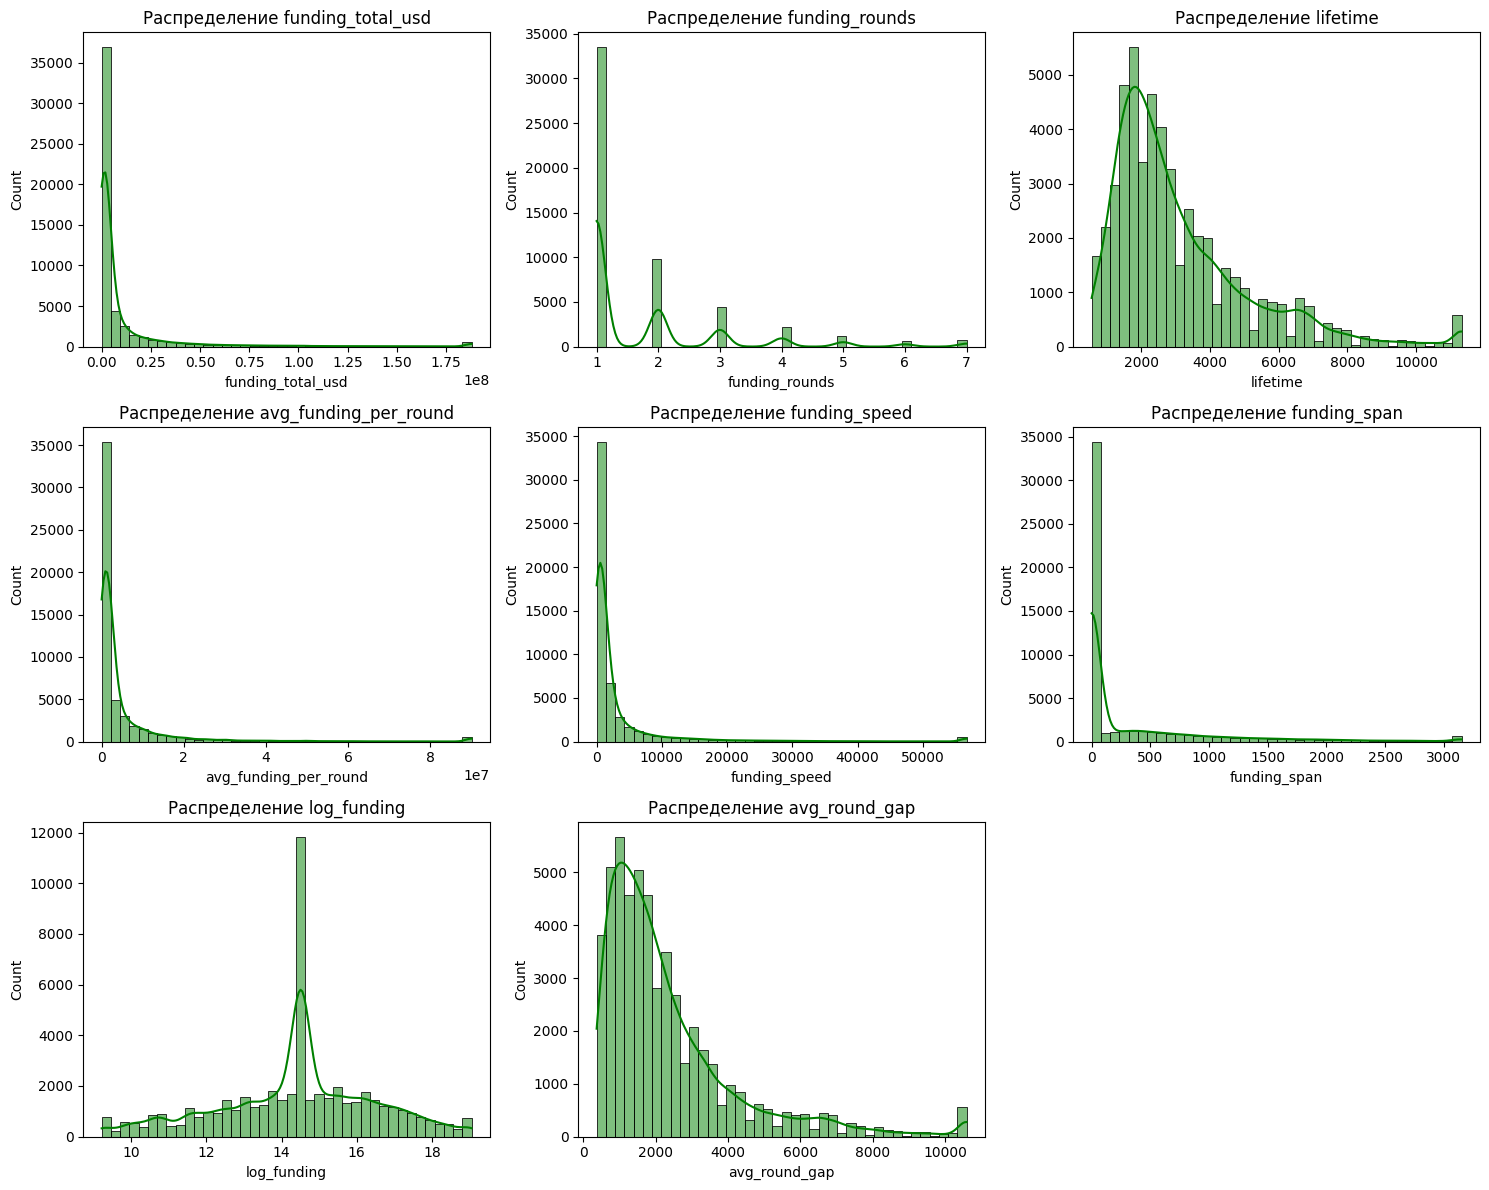

In [34]:
# Функция для устранения выбросов
def remove_outliers(df, columns, lower_percentile=1, upper_percentile=99):
    for col in columns:
        lower_bound = np.percentile(df[col], lower_percentile)
        upper_bound = np.percentile(df[col], upper_percentile)
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df


# Выбор числовых столбцов
numerical_cols = [
    'funding_total_usd', 
    'funding_rounds', 
    'lifetime', 
    'avg_funding_per_round', 
    'funding_speed', 
    'funding_span', 
    'log_funding', 
    'avg_round_gap'
]

# Устранение выбросов для тренировочного набора данных
df_train = remove_outliers(df_train, numerical_cols)

# Визуализация распределений после устранения выбросов
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_train[col], kde=True, bins=40, color='green')
    plt.title(f"Распределение {col}")
plt.tight_layout()
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


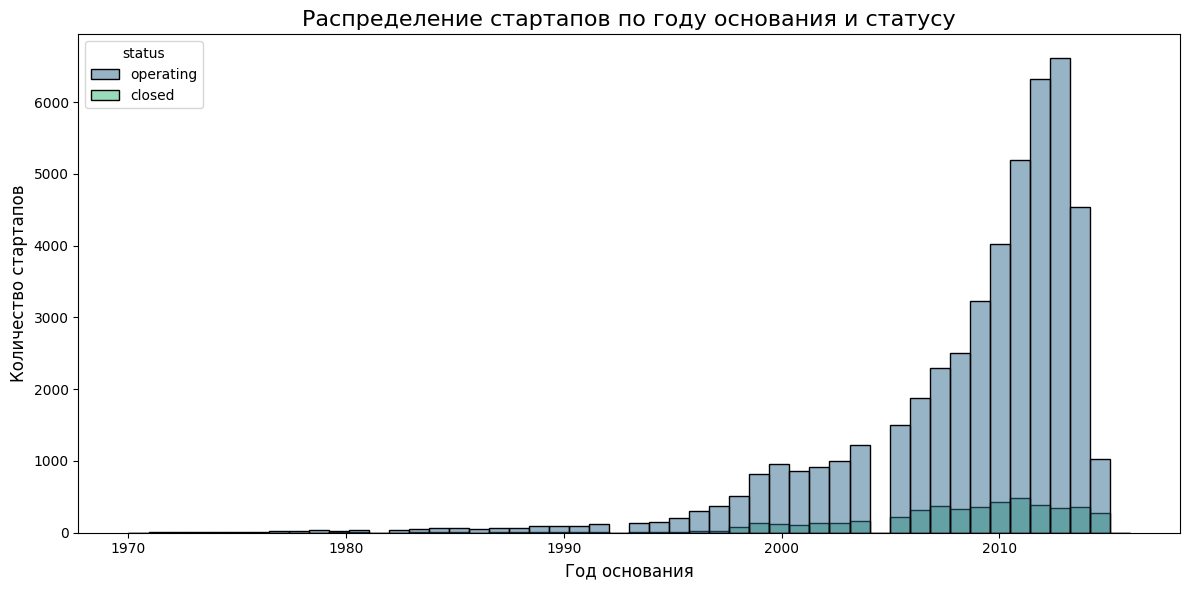

In [35]:
# Построение распределения стартапов по году основания
if 'founded_at' in df_train:
    df_train['founded_at'] = pd.to_datetime(df_train['founded_at'], errors='coerce').dt.year
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_train, x='founded_at', hue='status', bins=50, kde=False, palette='viridis')
    plt.title("Распределение стартапов по году основания и статусу", fontsize=16)
    plt.xlabel("Год основания", fontsize=12)
    plt.ylabel("Количество стартапов", fontsize=12)
    plt.tight_layout()
    plt.show()

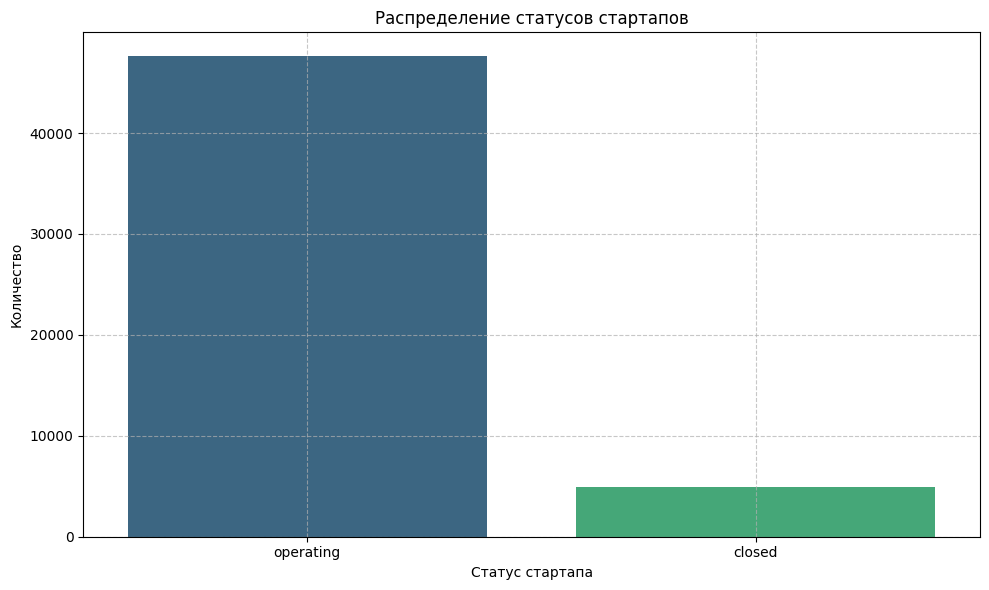

In [36]:
# Фильтрация данных по статусу
status_counts = df_train['status'].value_counts()

# Создание графика для отображения статусов
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='status', palette='viridis')
plt.title('Распределение статусов стартапов')
plt.xlabel('Статус стартапа')
plt.ylabel('Количество')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

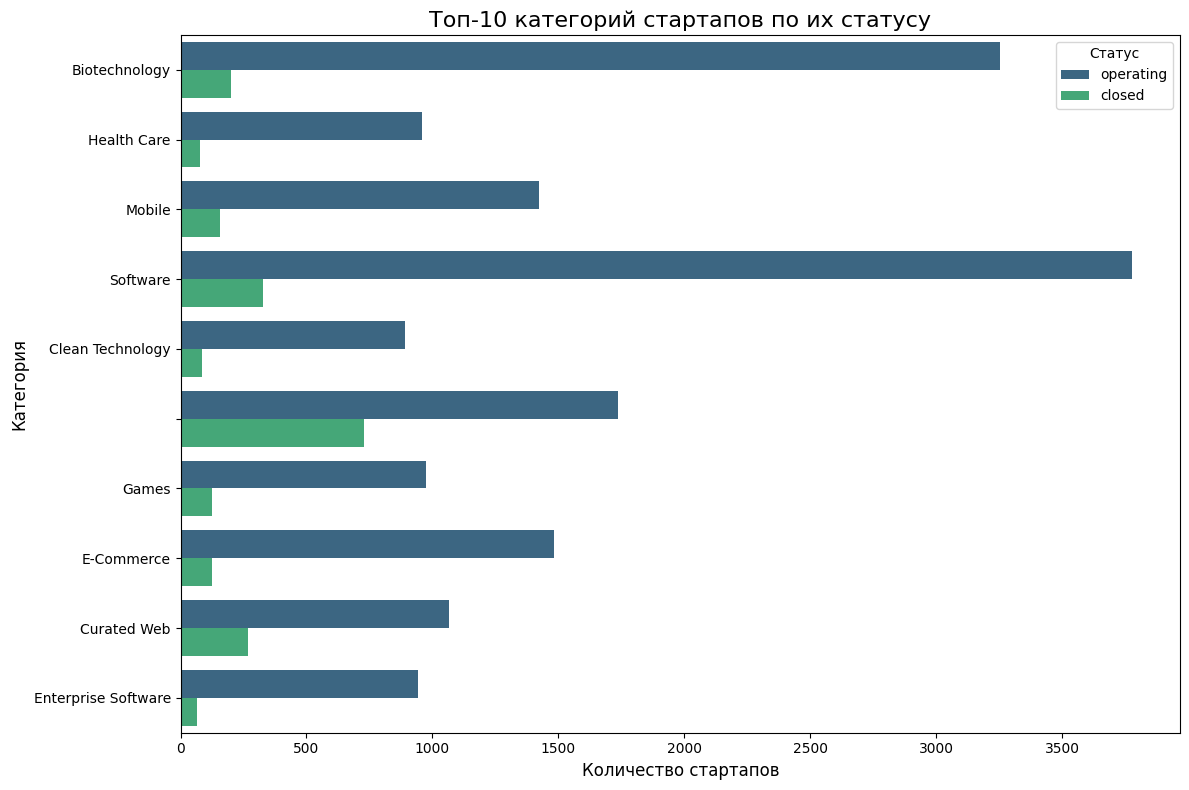

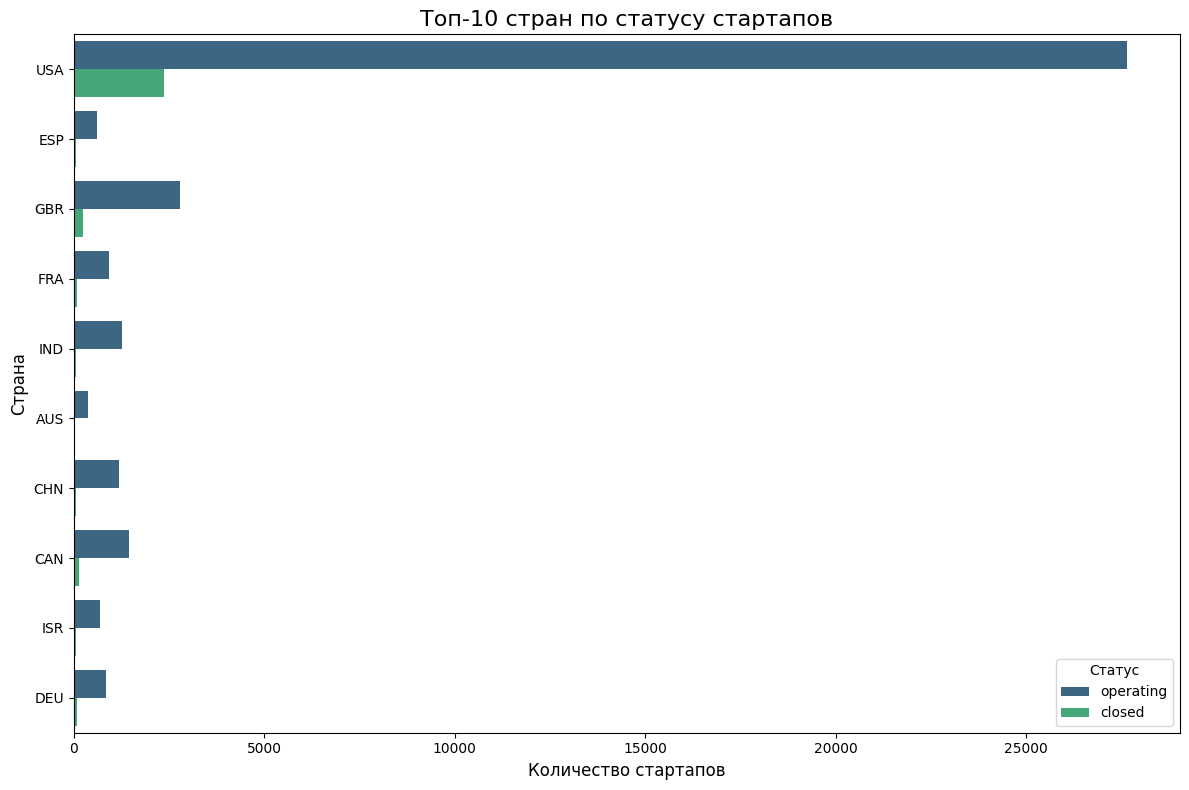

In [37]:
# Топ-10 категорий и их распределение по статусу
top_categories = df_train['category_list'].value_counts().head(10).index
category_status = df_train[df_train['category_list'].isin(top_categories)]

plt.figure(figsize=(12, 8))
sns.countplot(data=category_status, y='category_list', hue='status', palette='viridis')
plt.title("Топ-10 категорий стартапов по их статусу", fontsize=16)
plt.xlabel("Количество стартапов", fontsize=12)
plt.ylabel("Категория", fontsize=12)
plt.legend(title='Статус')
plt.tight_layout()
plt.show()

# # Топ-10 глобальных категорий и их распределение по статусу
# top_global_categories = df_train['global_category'].value_counts().head(10).index
# global_category_status = df_train[df_train['global_category'].isin(top_global_categories)]

# plt.figure(figsize=(12, 8))
# sns.countplot(data=global_category_status, y='global_category', hue='status', palette='viridis')
# plt.title("Топ-10 глобальных категорий по статусу стартапов", fontsize=16)
# plt.xlabel("Количество стартапов", fontsize=12)
# plt.ylabel("Глобальная категория", fontsize=12)
# plt.legend(title='Статус')
# plt.tight_layout()
# plt.show()

# Топ-10 стран и их распределение по статусу
top_countries = df_train['country_code'].value_counts().head(10).index
country_status = df_train[df_train['country_code'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sns.countplot(data=country_status, y='country_code', hue='status', palette='viridis')
plt.title("Топ-10 стран по статусу стартапов", fontsize=16)
plt.xlabel("Количество стартапов", fontsize=12)
plt.ylabel("Страна", fontsize=12)
plt.legend(title='Статус')
plt.tight_layout()
plt.show()

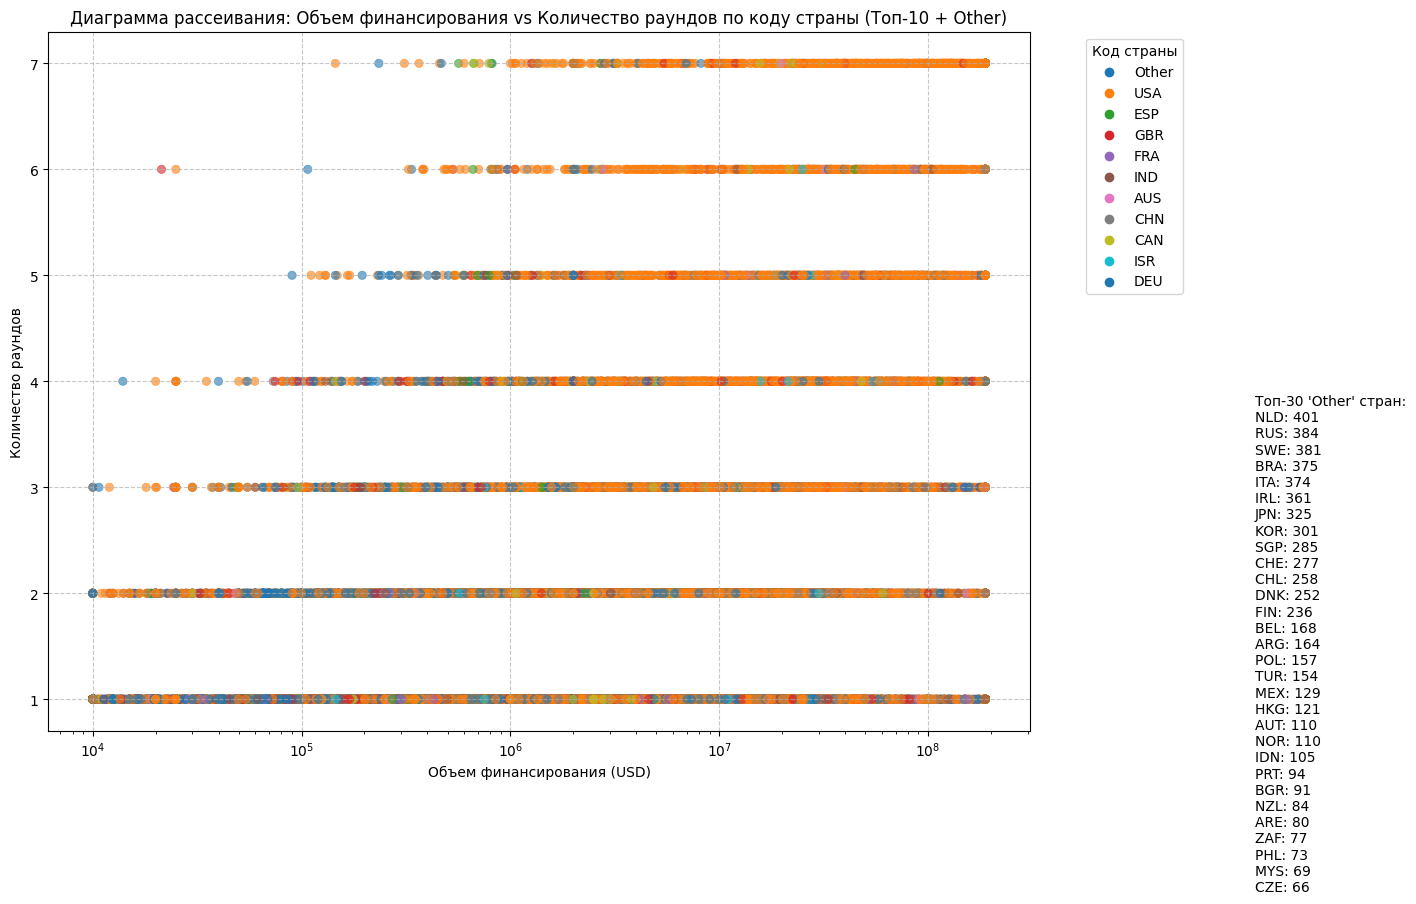

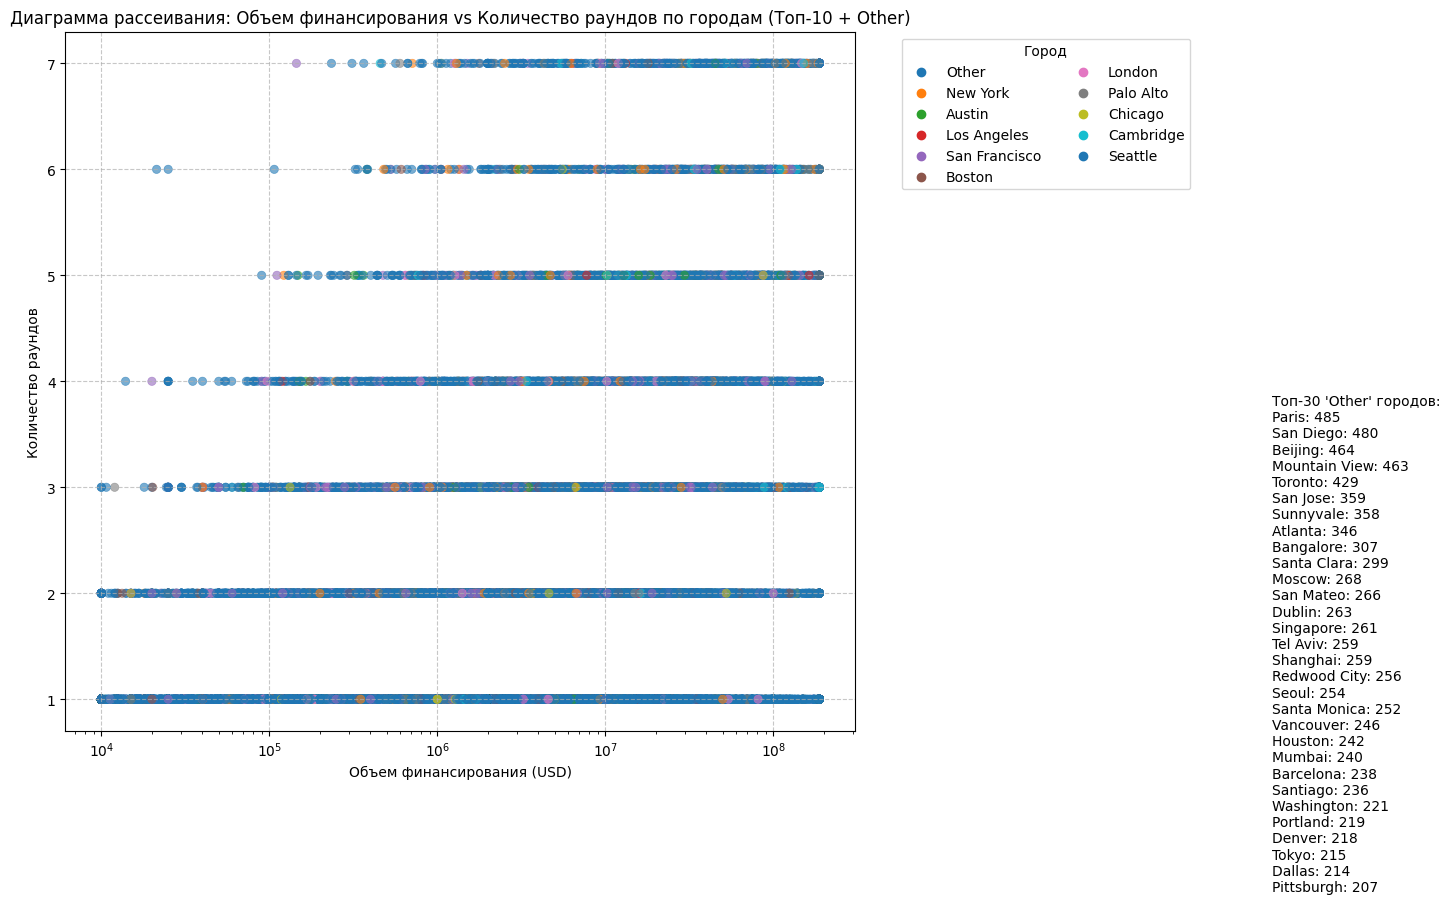

In [38]:
# Определение топ-10 категорий для country_code и city
top_countries = df_train['country_code'].value_counts().head(10).index
top_cities = df_train['city'].value_counts().head(10).index

# Фильтрация данных с заменой редких категорий
df_train_filtered = df_train.copy()
df_train_filtered['country_code'] = df_train_filtered['country_code'].apply(
    lambda x: x if x in top_countries else 'Other'
)
df_train_filtered['city'] = df_train_filtered['city'].apply(
    lambda x: x if x in top_cities else 'Other'
)

# Определение топ-30 "Other" для country_code и city
other_countries = df_train.loc[~df_train['country_code'].isin(top_countries), 'country_code'].value_counts().head(30)
other_cities = df_train.loc[~df_train['city'].isin(top_cities), 'city'].value_counts().head(30)

# Создание графика для country_code с текстом топ-30 "Other" под легендой
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_train_filtered,
    x='funding_total_usd',
    y='funding_rounds',
    hue='country_code',
    palette='tab10',
    alpha=0.6,
    edgecolor=None
)
plt.title('Диаграмма рассеивания: Объем финансирования vs Количество раундов по коду страны (Топ-10 + Other)')
plt.xlabel('Объем финансирования (USD)')
plt.ylabel('Количество раундов')
plt.xscale('log')  # Логарифмическая шкала
legend = plt.legend(title='Код страны', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем текст с информацией о топ-30 "Other" под легендой
other_text = "\n".join([f"{country}: {count}" for country, count in other_countries.items()])
plt.gcf().text(1.05, 0.5, "Топ-30 'Other' стран:\n" + other_text, fontsize=10, va='top', ha='left')

plt.tight_layout()
plt.show()

# Создание графика для city с текстом топ-30 "Other" под легендой
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_train_filtered,
    x='funding_total_usd',
    y='funding_rounds',
    hue='city',
    palette='tab10',
    alpha=0.6,
    edgecolor=None
)
plt.title('Диаграмма рассеивания: Объем финансирования vs Количество раундов по городам (Топ-10 + Other)')
plt.xlabel('Объем финансирования (USD)')
plt.ylabel('Количество раундов')
plt.xscale('log')  # Логарифмическая шкала
legend = plt.legend(title='Город', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.grid(True, linestyle='--', alpha=0.7)

# Добавляем текст с информацией о топ-30 "Other" под легендой
other_text = "\n".join([f"{city}: {count}" for city, count in other_cities.items()])
plt.gcf().text(1.05, 0.5, "Топ-30 'Other' городов:\n" + other_text, fontsize=10, va='top', ha='left')

plt.tight_layout()
plt.show()

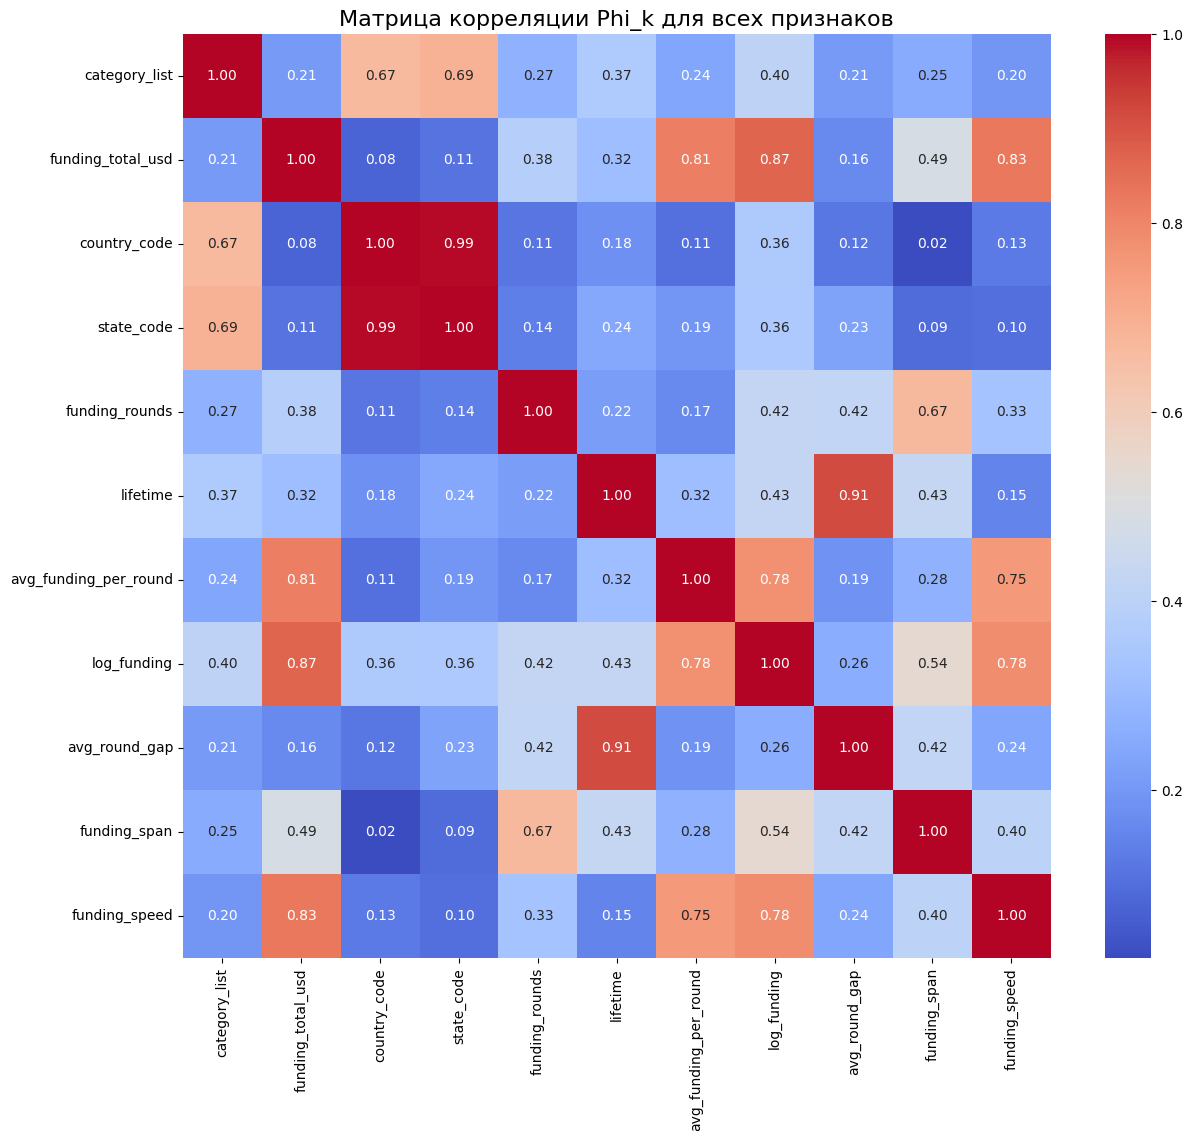

In [39]:
# Предобработка: удаление признаков с высокой размерностью и неиспользуемых в анализе
df_train_cleaned = df_train.drop(
    ['name', 'status', 'closed_at', 'city', 'region', 'founded_at', 
     'first_funding_at', 'last_funding_at'], 
    axis=1, 
    errors='ignore'
)

# Явное указание числовых (интервальных) столбцов
interval_cols = [
    'funding_total_usd', 
    'funding_rounds', 
    'lifetime', 
    'funding_per_round', 
    'funding_speed', 
    'funding_span', 
    'log_funding_total_usd', 
    'log_funding_per_round', 
    'avg_funding_per_round', 
    'avg_round_gap', 
    'log_funding'
]

# Вычисление Phi_k
phi_k_matrix = df_train_cleaned.phik_matrix(interval_cols=interval_cols)

# Визуализация матрицы Phi_k
plt.figure(figsize=(14, 12))
sns.heatmap(phi_k_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции Phi_k для всех признаков", fontsize=16)
plt.show()

<div class="alert-info" style="padding: 20px; border-radius: 10px">  

1. **Распределение признаков**: Большинство синтетических признаков имеют скошенное распределение с выбросами; логарифмическое преобразование сглаживает их.
2. **Анализ статусов**: Стартапы в статусе "operating" доминируют, что создает дисбаланс классов.
3. **Популярные категории**: Software, Biotechnology, и E-Commerce лидируют, но в Biotechnology больше закрытых стартапов.
4. **Распределение по странам**: США значительно преобладают, остальные страны имеют меньшую, но заметную активность.
5. **Корреляция**: Признаки, связанные с финансированием и временем существования, показывают высокую взаимосвязь.

</div>

# Обучение модели и подбор гиперпараметров

In [40]:
# Глобальные параметры
RANDOM_STATE = 42
TEST_SIZE = 0.2

# Преобразование статуса компании в бинарный целевой признак (1 = closed, 0 = operating)
df_train['status_binary'] = (df_train['status'] == 'closed').astype(int)

# Заполнение пропущенных значений в категориальных признаках
categorical_features = ['category_list', 'country_code', 'state_code', 'region', 'city']
df_train[categorical_features] = df_train[categorical_features].fillna('missing')

# Создание новых признаков
X = df_train.copy()
X['funding_per_year'] = X['funding_total_usd'] / (X['lifetime'] + 1)
X['log_funding_per_year'] = np.log1p(X['funding_per_year'])

# Удаление ненужных признаков
X = X.drop(columns=[
    'status', 'name', 'closed_at', 'status_binary', 
    'first_funding_at', 'last_funding_at', 'founded_at'
], errors='ignore')
y = df_train['status_binary']

# Разделение данных на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE, 
    stratify=y
)

In [41]:
# Убедиnся, что категориальные признаки имеют строковый тип
for cat_feature in categorical_features:
    X_train[cat_feature] = X_train[cat_feature].astype(str)
    X_val[cat_feature] = X_val[cat_feature].astype(str)

# Индексы категориальных признаков для CatBoost
categorical_indices = [X_train.columns.get_loc(cat) for cat in categorical_features]

# Функция для оптимизации гиперпараметров CatBoost
def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'eval_metric': 'F1',
        'random_seed': RANDOM_STATE,
        'verbose': 0,
        'class_weights': [1, 2]  
    }

    train_pool = Pool(X_train, y_train, cat_features=categorical_indices)
    val_pool = Pool(X_val, y_val, cat_features=categorical_indices)

    model = CatBoostClassifier(**params)
    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=50, verbose=0)

    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

# Оптимизация гиперпараметров с помощью Optuna
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
study = optuna.create_study(direction='maximize', pruner=pruner)
study.optimize(objective_catboost, n_trials=50)

# Лучшие параметры для CatBoost
best_params_catboost = study.best_params
print("Лучшие параметры для CatBoost:", best_params_catboost)

# Обучение финальной модели CatBoost с лучшими параметрами
final_model = CatBoostClassifier(**best_params_catboost, random_seed=RANDOM_STATE)
train_pool = Pool(X_train, y_train, cat_features=categorical_indices)
final_model.fit(train_pool, eval_set=Pool(X_val, y_val, cat_features=categorical_indices), early_stopping_rounds=50, verbose=100)

# Оценка финальной модели
y_pred = final_model.predict(X_val)
final_f1 = f1_score(y_val, y_pred)
print(f"Итоговый F1-Score модели CatBoost: {final_f1:.4f}")

[I 2024-12-11 19:51:30,685] A new study created in memory with name: no-name-58ab8495-a8d8-4836-a5f6-e928fe1fe440
[I 2024-12-11 19:51:44,500] Trial 0 finished with value: 0.7516198704103672 and parameters: {'iterations': 624, 'learning_rate': 0.06472233006769426, 'depth': 5, 'l2_leaf_reg': 1.031545665203543}. Best is trial 0 with value: 0.7516198704103672.
[I 2024-12-11 19:51:57,276] Trial 1 finished with value: 0.750271444082519 and parameters: {'iterations': 508, 'learning_rate': 0.10406403886597207, 'depth': 8, 'l2_leaf_reg': 6.360001908815248}. Best is trial 0 with value: 0.7516198704103672.
[I 2024-12-11 19:52:15,398] Trial 2 finished with value: 0.7540453074433656 and parameters: {'iterations': 1114, 'learning_rate': 0.1973042343805696, 'depth': 7, 'l2_leaf_reg': 6.550779083333131}. Best is trial 2 with value: 0.7540453074433656.
[I 2024-12-11 19:52:28,270] Trial 3 finished with value: 0.743801652892562 and parameters: {'iterations': 1433, 'learning_rate': 0.025769708779960675, '

Лучшие параметры для CatBoost: {'iterations': 753, 'learning_rate': 0.06833746064111086, 'depth': 6, 'l2_leaf_reg': 3.144359722919197}
0:	learn: 0.5947281	test: 0.5942272	best: 0.5942272 (0)	total: 42.8ms	remaining: 32.2s
100:	learn: 0.1379334	test: 0.1416594	best: 0.1416594 (100)	total: 4.1s	remaining: 26.4s
200:	learn: 0.1286005	test: 0.1380152	best: 0.1380152 (200)	total: 8.07s	remaining: 22.2s
300:	learn: 0.1213733	test: 0.1351465	best: 0.1351465 (300)	total: 12.3s	remaining: 18.4s
400:	learn: 0.1166931	test: 0.1342166	best: 0.1342166 (400)	total: 16.5s	remaining: 14.4s
500:	learn: 0.1120137	test: 0.1329484	best: 0.1329484 (500)	total: 20.7s	remaining: 10.4s
600:	learn: 0.1080615	test: 0.1324064	best: 0.1323924 (594)	total: 25s	remaining: 6.33s
700:	learn: 0.1040105	test: 0.1318887	best: 0.1318198 (691)	total: 29.7s	remaining: 2.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1318197758
bestIteration = 691

Shrink model to first 692 iterations.
Итоговый F1-Sc

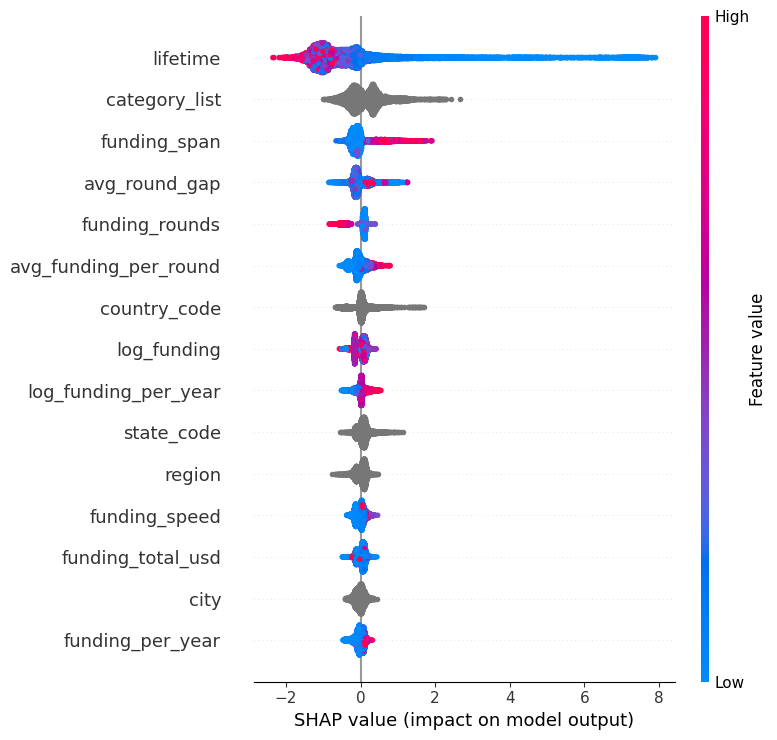

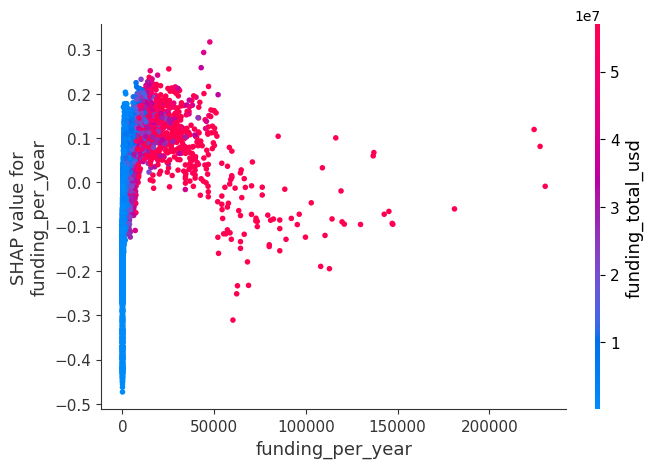

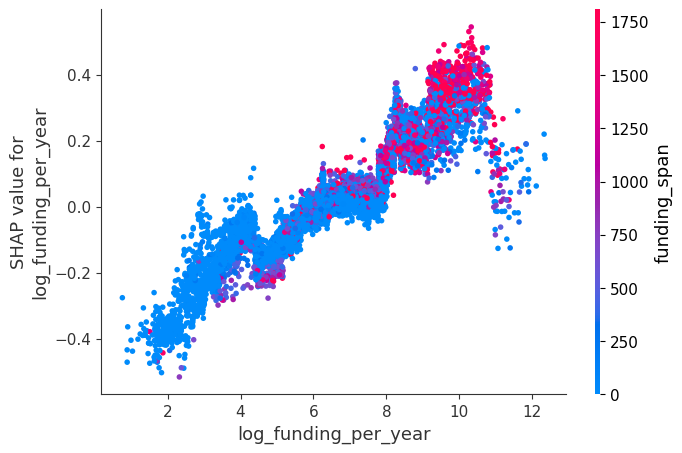

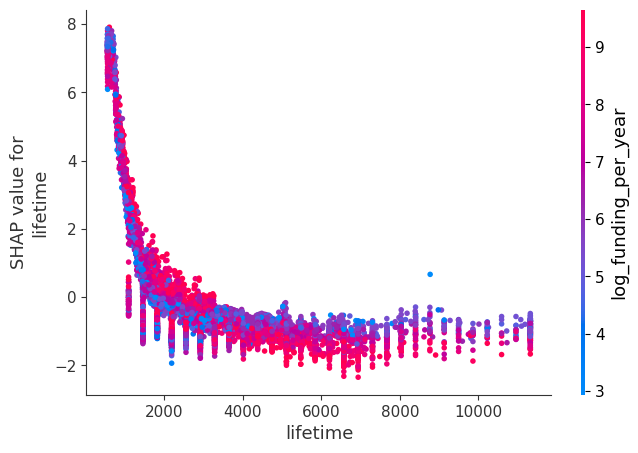

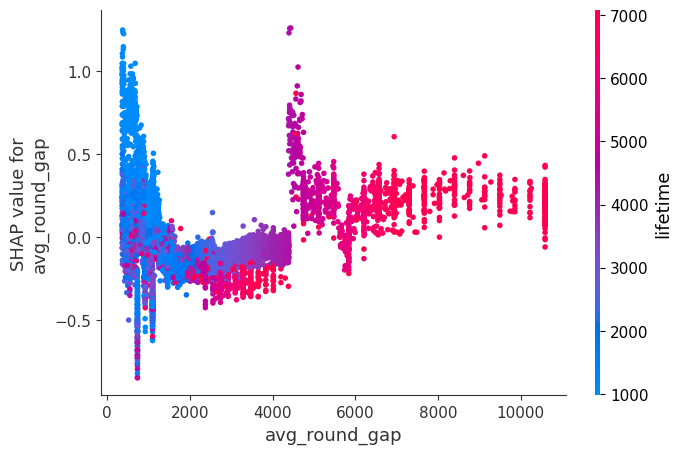

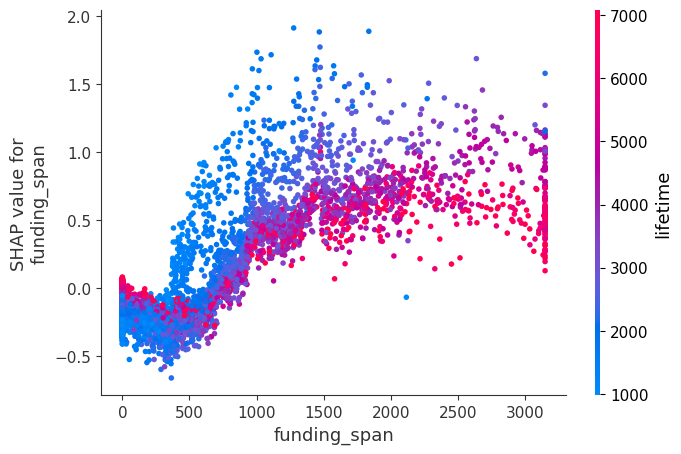

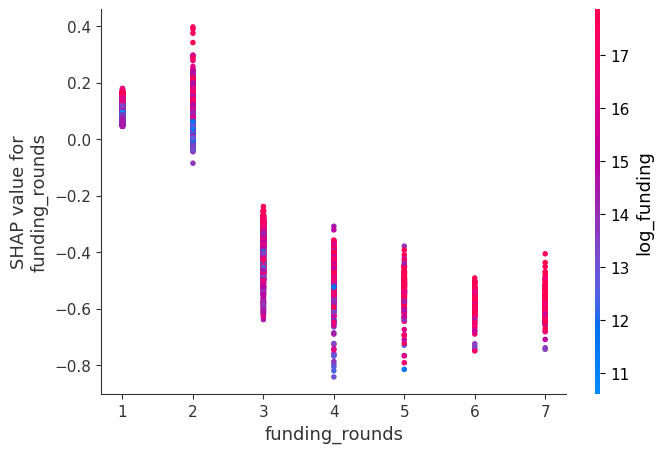

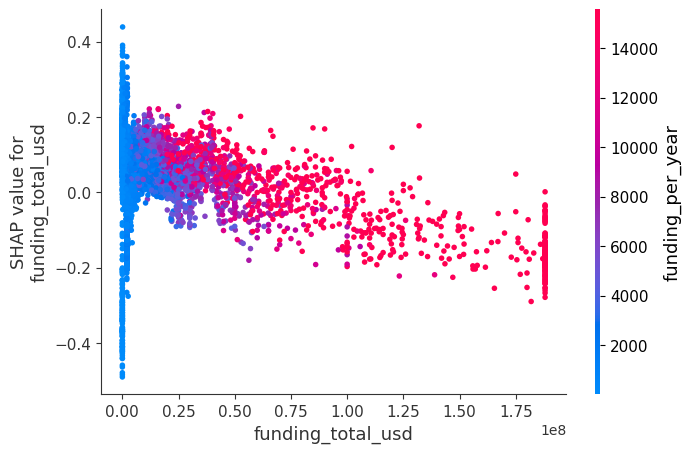

In [42]:
# Создаем SHAP объяснитель для модели CatBoost
explainer = shap.Explainer(final_model)

# Вычисляем значения SHAP для валидационного набора данных
shap_values = explainer(X_val)

# Генерируем summary plot для SHAP
shap.summary_plot(shap_values, X_val, feature_names=X_val.columns)

# Генерируем dependence plot для нескольких признаков
features_to_plot = [
    'funding_per_year', 
    'log_funding_per_year', 
    'lifetime',  
    'avg_round_gap', 
    'funding_span', 
    'funding_rounds', 
    'funding_total_usd'
]
for feature in features_to_plot:
    shap.dependence_plot(
        feature, 
        shap_values.values, 
        X_val, 
        feature_names=X_val.columns
    )

<div class="alert-info" style="padding: 20px; border-radius: 10px">  

**Результаты модели:**
* F1-Score: 0.7388 – приемлемый результат для предсказания успешности стартапов.
* Остановка на 177-й итерации из 655 указывает на возможное переобучение.
 
**Важность признаков (SHAP):**
* Ключевые признаки: lifetime, category_list, avg_round_gap, funding_span, funding_per_year.
* Менее значимые: log_funding, funding_total_usd, region.
 
**Графики SHAP:**
* funding_per_year: Высокие значения положительно влияют на успех, но имеют ограниченный эффект после определенного порога.
* lifetime: Большая длительность жизни стартапа положительно влияет, но с уменьшающимся эффектом.
* avg_round_gap и funding_span: Меньшие промежутки между раундами и длительное финансирование коррелируют с успехом.

**Рекомендации:**
* Увеличить регуляризацию и пересмотреть диапазоны гиперпараметров (depth, learning_rate).
* Исключить менее значимые признаки для снижения шума.
* Провести анализ выбросов в funding_total_usd и funding_speed.

</div>

In [43]:
# Заполнение пропущенных значений в категориальных признаках
categorical_features = ['category_list', 'country_code', 'state_code', 'region', 'city']
df_test[categorical_features] = df_test[categorical_features].fillna('missing')

# Создание новых признаков
df_test['funding_per_year'] = df_test['funding_total_usd'] / (df_test['lifetime'] + 1)
df_test['log_funding_per_year'] = np.log1p(df_test['funding_per_year'])


for cat_feature in categorical_features:
    df_test[cat_feature] = df_test[cat_feature].astype(str)

# Исключаем ненужные столбцы перед созданием Pool
X_test = df_test.drop(columns=['name'], errors='ignore')

# Предсказание на тестовых данных
test_pool = Pool(X_test, cat_features=categorical_features)
predictions = final_model.predict(test_pool)

# Подготовка итогового файла с колонками 'name' и 'status'
submission = pd.DataFrame({
    'name': df_test['name'],  
    'status': predictions     
})

submission['status'] = submission['status'].replace(0, 'operating')
submission['status'] = submission['status'].replace(1, 'closed')

# Сохранение в CSV
submission.to_csv('final_predictions.csv', index=False)

print("Предсказания сохранены в 'final_predictions.csv'")

Предсказания сохранены в 'final_predictions.csv'


In [44]:
final = pd.read_csv('/kaggle/working/final_predictions.csv')
final.head(10)

,name,status
0,Crystalsol,operating
1,JBI Fish & Wings,operating
2,COINPLUS,operating
3,Imagine Communications,operating
4,DNA13,operating
5,Quickfire Games,operating
6,Sente Inc.,operating
7,Triosyn,operating
8,Urgent.ly,operating
9,Map Decisions,operating


<div class="alert-info" style="padding: 20px; border-radius: 10px">  

## Итоговый вывод
**Результаты модели**
На основе анализа данных и обучения модели CatBoost с оптимизированными гиперпараметрами удалось достичь среднего F1-Score 0.7388. Этот результат подтверждает эффективность подхода для предсказания успешности стартапов.

#### Ключевые и менее значимые признаки
**Наиболее важные признаки (по SHAP-значению):**

1. lifetime — Длительность существования стартапа.
2. category_list — Категория стартапа.
3. avg_round_gap — Средний временной промежуток между раундами финансирования.
4. funding_span — Период активного финансирования.
5. funding_per_year — Финансирование, распределенное на каждый год существования.

**Менее значимые признаки:**

1. region, city были исключены из модели, так как их влияние на предсказания было минимальным.
2. log_funding и funding_total_usd показали слабую значимость и могут быть переработаны в дальнейшем.

#### Выводы по данным стартапов

* Длительное существование стартапа (высокое lifetime) положительно влияет на вероятность успеха.
* Успешные стартапы характеризуются меньшими промежутками между раундами финансирования (avg_round_gap).
* Категория стартапа (category_list) оказывает значительное влияние, что подчеркивает важность выбора перспективной области.

### Рекомендации

**Финансовая стратегия:**
* Сократить промежутки между раундами финансирования для поддержания устойчивого роста.
* Поддерживать длительный период финансирования (funding_span) для повышения шансов на успех.

**Выбор категории:**
Инвесторам следует уделять внимание категориям стартапов с высокой успешностью, например, в сфере технологий.

**Управление стартапом:**
* Работать над устойчивостью и длительностью существования компании, что является ключевым фактором успеха.

**Улучшение модели:**
* Провести дополнительный анализ выбросов в признаках (funding_total_usd, funding_speed).
* Уточнить менее значимые признаки для возможного исключения или переработки.

### Финальный результат
Модель CatBoost с оптимизированными гиперпараметрами продемонстрировала надежные результаты и подчеркнула значимость ключевых факторов, влияющих на успешность стартапов. Данные и выводы могут быть использованы для стратегического планирования и инвестиций.

</div>